<a href="https://colab.research.google.com/github/Gus-22/Gus-22/blob/main/6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><u>**Sistemas lineares: Aplicações** </u></center>

<br>

***
***
***

<br>


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

def triangulariza_n(M):
  '''
  Triangulariza uma matriz M de dimensão qualquer.
  '''
  # obtém o número de linhas da matriz
  n = len(M)
  # laço for que percorre as colunas da matriz
  for j in range(n):
    # laço for que percorre as linhas abaixo da diagonal principal
    for i in range(j+1, n):
      # calcula o fator de multiplicação t para eliminar o elemento M[i][j]
      t = M[i, j] / M[j, j]
      # atualiza a linha i da matriz M para eliminar o elemento M[i][j]
      M[i] = M[i] - t * M[j]
  #retorna a matriz triangular
  return M

def solve_n(A, b):
  '''
  Resolve sistemas n x n, triangularizando-os primeiro.
  '''
  # np.hstack cria a matriz aumentada do sistema, juntando a matriz principal e os resultados
  M = np.hstack((A, b))
  # triangulariza_n está escalonando a matriz M
  M = triangulariza_n(M)
  # A passa a ser M menos a ultima coluna, ou seja, desfaz hstack
  A = M[:, :-1]
  # b passa a ser separado novamente, possibilitando o uso da função solve_triang_n
  b = M[:, -1]
  # solve_triang_n resolve a matriz
  x = solve_diag_n(A, b)
  return x

def solve_diag_n(A, b):
  #obtém o tamanho da matriz A(n x n)
  n = len(A)
  #cria um vetor x de zeros
  x = np.zeros(n)
  #começa a solução do sistema a partir da última linha até a primeira
  for k in range(n-1, -1, -1):
    #variável para calcular a soma dos produtos da linha atual
    soma = 0
    #percorre as colunas da matriz A a partir da diagonal principal
    for i in range(k+1, n):
      #soma o produto do elemento da matriz A com o elemento correspondente do vetor x
      soma = soma + A[k][i] * x[i]
    #calcula o valor de x[k] - variável na linha k do vetor x
    x[k] = (b[k] - soma) / A[k, k]
  #retorna o vetor x com a solução do sistema linear
  return x

def escalona(M):
  '''
  Retorna a forma escalonada reduzida da matriz M.
  '''
  # obtém o número de linhas da matriz
  n = len(M)
  # laço for que percorre as linhas da matriz
  for k in range(n):
    # substitui a linha, fazendo com que o elemento M[k][k] seja igual a 1
    M[k] = M[k] / M[k, k] # divide a linha k inteira pelo elemento da diagonal
    # laço for que percorre as linhas da matriz
    for i in range(n):
      # verifica se a linha não é a mesma linha que acabamos de substituir
      if i != k:
        # atualiza as outras linhas, fazendo com que os elementos abaixo de M[i][k] sejam 0
        M[i] = M[i] - M[i, k] * M[k]
  #retorna a matriz escalonada reduzida
  return M

## **<u>1. Interpolação polinomial</u>**
<br>

Interpolação polinomial trata de responder a seguinte pergunta:

> **Dados $n+1$ pontos de seu gráfico,**
$$(x_0, y_0),$$ $$(x_1, y_1),$$ $$\vdots,$$ $$(x_n, y_n),$$
**como determinar um polinômio de grau $n$ cujo gráfico passe por esses mesmos pontos?**

<br>

Ou seja, queremos obter coeficientes $a_0, a_1, \ldots, a_n$ tal que o polinômio

$$
P_n(x)= a_0 + a_1x+...+ax^n
$$

satisfaz o sistema de equações

$$
\begin{cases}
P(x_0)=y_0\\
P(x_1)=y_1\\
\quad\vdots\\
P(x_n)=y_n
\end{cases}.
$$

<br>

***

<br>

## Exercício 1:<br>

(a) Ao longo de uma dia, foi tomada a temperatura (em $^\circ$C) numa região de uma cidade, por quatro vezes no período das 6 às 12 horas. Construa o polinômio de grau 3 que interpola os dados da tabela abaixo.

Hora |Temp. |
-----|------|
6    |18.5  |
8    |20.3  |
10   |24.0  |
12   |28.2  |



In [ ]:
#definindo x e y de acordo com os dados
x = np.array([6, 8, 10, 12])
y = np.array([[18.5, 20.3, 24.0, 28.2]]).T

#definindo a matriz A
A = np.array([x**0, x, x**2, x**3]).T

#achando a solução da matriz A usando y=b como termos independentes
coeficientes = solve_n(A, y)

#definindo a função do polinômio
funcao = lambda x: coeficientes[0] + coeficientes[1]*x + coeficientes[2]*x**2 + coeficientes[3]*x**3

#definindo o símbolo x para expandir a expressão
x_simbolo = sp.symbols("x")
sp.expand(funcao(x_simbolo))

-0.0291666666666666*x**3 + 0.937499999999999*x**2 - 7.90833333333333*x + 38.5

<br>

(b)  Plote o gráfico do polinômio, mostrando os pontos dados acima.

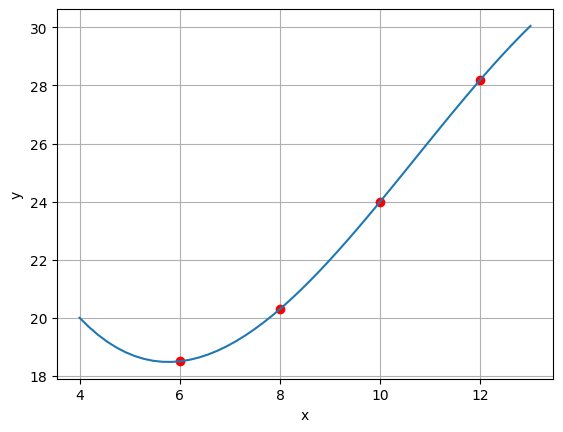

In [ ]:
# criando
X = np.linspace(4, 13)
plt.plot(x, y, "ro", X, funcao(X))
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<br>

(c) Estime a temperatura às 9 e às 11 horas.

In [ ]:
print(np.round(funcao(9)))
print()
print(np.round(funcao(11)))

22.0

26.0


<br>

***

<br>

## Exercício 2: <br>

Escolha uma moeda internacional (dólar, euro, peso, etc) e pesquise na internet a sua cotação nos últimos 6 dias, incluindo hoje. Utilizando um polinômio interpolador, estime qual será a cotação dessa moeda amanhã.

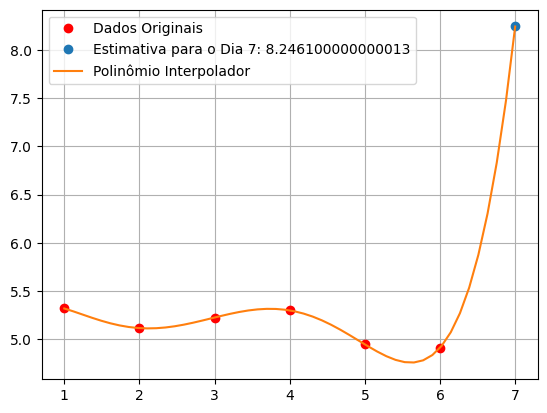

In [ ]:
# COTAÇÃO DO DÓLAR NOS 6 PRIMEIROS MESES DE 2023 E ESTIMATIVA PARA O MÊS 7 (mês 7 foi 4.8222)

# definindo x e y de acordo com os dados
mes = np.array([1, 2, 3, 4, 5, 6])
X = np.linspace(1, 7)
cotacao = np.array([[5.3183], [5.1146], [5.2243], [5.2981], [4.9455], [4.9103]])

# construção da matriz A com potência dos meses do ano
A = np.array([mes**0, mes, mes**2, mes**3, mes**4, mes**5]).T

# coeficientes do polinômio interpolador
coeficientes = solve_n(A, cotacao)

# função lambda para o polinômio interpolador
funcao = lambda x: coeficientes[0] + coeficientes[1]*x + coeficientes[2]*x**2 + coeficientes[3]*x**3 + coeficientes[4]*x**4 + coeficientes[5]*x**5

# estimando a cotação no próximo mes (JULHO = 7)
cotacao_previsao = funcao(7)

# plotando o gráfico
plt.plot(mes, cotacao, 'ro', label='Dados Originais')
plt.plot(7, cotacao_previsao, 'o', label=f'Estimativa para o Dia 7: {cotacao_previsao}')
plt.plot(X, funcao(X), label='Polinômio Interpolador')
plt.grid()
plt.legend()
plt.show()

<br><br>

***
***
***

<br>

## **<u>2. Aproximação por mínimos quadrados</u>**
<br>

Mínimos quadráticos é um método para resolver problemas do seguinte tipo:

> **Dados $n$ pontos não necessariamente alinhados,**

$$(x_0, y_0),$$
$$(x_1, y_1),$$
$$\vdots$$
$$(x_{n-1}, y_{n-1}),$$

**como determinar a <u>reta</u> que passa mais próxima a eles?**

<br>



<br>

Note que essa reta pode ser interpretada como a tendência desse conjunto de dados, por exemplo.

<br>

Em geral, uma reta é gerada por uma função linear

$$
f(x) = ax + b.
$$

Assim, buscamos a reta que passa mais próxima a esse conjunto de pontos. Ou seja, queremos minimizar a distância entre $y_i$ e $f(x_i)$. Uma maneira de fazer isso é minimizar a **diferença ao quadrado** entre esses valores:

$$
(f(x_i) - y_i)^2 = (ax_i + b - y_i)^2,
$$
para cada $i=0, 1, \ldots, n-1$.

<br>

Logo, chegamos ao seguinte problema:

\begin{align}
\text{Dados}& \quad(x_0, y_0), (x_1, y_1), \ldots, (x_{n-1}, y_{n-1})\\
\min_{a, b}& \quad\sum_{i=0}^{n-1}(ax_i + b - y_i)^2.
\end{align}

<br>

Podemos entender

$$g(a, b) = \sum_{i=0}^{n-1}(ax_i + b - y_i)^2$$

como uma função de duas variáveis $a, b$ a ser minimizada. Como essa é uma função diferenciável, sabemos que seu ponto de mínimo é tal que as **derivadas parciais são iguais a zero**, ou seja:

\begin{align}
\frac{\partial}{\partial a}g(a,b) &= \sum_{i=0}^{n-1}\frac{\partial}{\partial a}(ax_i + b - y_i)^2\\
&= \sum_{i=0}^{n-1}2(ax_i + b - y_i)\cdot x_i\\
&= 2\left[a\sum_{i=0}^{n-1}x_i^2 + b\sum_{i=0}^{n-1}x_i - \sum_{i=0}^{n-1}y_i x_i\right] = 0\\\\
\frac{\partial}{\partial b}g(a,b) &= \sum_{i=0}^{n-1}\frac{\partial}{\partial b}(ax_i + b - y_i)^2\\
&= \sum_{i=0}^{n-1}2(ax_i + b - y_i)\cdot 1 \\
&= 2\left[a\sum_{i=0}^{n-1}x_i + nb - \sum_{i=0}^{n-1}y_i\right] = 0.
\end{align}

Isso nos leva a um sistema linear nas variáveis $a, b$,

$$
\begin{cases}
\big(\sum_{i=0}^{n-1}x_i^2\big)a + \big(\sum_{i=0}^{n-1}x_i\big)b = \sum_{i=0}^{n-1}y_i x_i\\\\
\big(\sum_{i=0}^{n-1}x_i\big)a + nb = \sum_{i=0}^{n-1}y_i
\end{cases},
$$

que pode ser resolvido através de métodos vistos em aula.

Assim, determinamos $a,b$ e a função linear $f(x) = ax+b$.



<br>

***

<br>

## Exercício 3: <br>

Utilizando os dados de temperatura do exercício anterior (abaixo), determine a reta que melhor representa a variação da temperatura em função do tempo e plote seu gráfico (junto com os pontos dados).

Hora |Temp. |
-----|------|
6    |18.5  |
8    |20.3  |
10   |24.0  |
12   |28.2  |

In [ ]:
# Dados de temperatura (y) e hora (x)
x = np.array([6, 8, 10, 12])
y = np.array([18.5, 20.3, 24.0, 28.2])

# Número de pontos de dados
n = len(x)

#np.sum faz o somatório
soma_x2 = np.sum(x**2)
soma_x = np.sum(x)
soma_y = np.sum(y)
soma_xy = np.sum(x*y)

# criando a matriz
A = np.array([[soma_x2, soma_x],
             [soma_x, n]])

b = np.array([[soma_xy],
             [soma_y]])

resultado = solve_n(A, b)

# Calcula os coeficientes da reta, os valor de 'a' e 'b' que estão em resultado[0] e resultado[1]
a = resultado[0]
b = resultado[1]

print(f'a = {a}, b = {b}')

a = 1.6400000000000006, b = 7.989999999999993


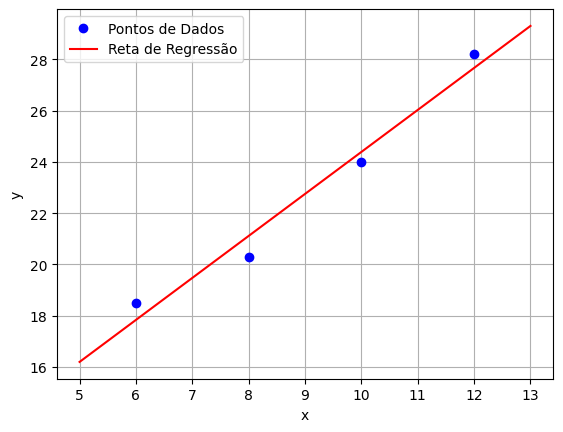

In [ ]:
temperaturas = lambda x: a * x + b

X = np.linspace(5, 13)

# Plota os pontos de dados
plt.plot(x, y, 'o', label='Pontos de Dados', color='blue')

# Plota a reta de regressão
plt.plot(X, temperaturas(X), label='Reta de Regressão', color='red')

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<br>

***

<br>

## Exercício 4: <br>

Dados os pontos com coordenadas abaixo, determine a reta que passa mais próxima a todos eles.

In [ ]:
# Dados de temperatura (y) e hora (x)
x = np.array([1.12, 1.23, 1.28, 1.34, 1.36, 1.39, 1.44, 1.45, 1.47, 1.56, 1.58,
              1.61, 1.63, 1.64, 1.68, 1.69, 1.74, 1.79, 1.80, 1.83, 1.87, 1.95])
y = np.array([2.86, 2.71, 2.45, 2.32, 2.22, 2.29, 2.02, 2.37, 2.43, 2.12, 2.33,
              2.04, 2.19, 2.37, 2.38, 2.15, 2.28, 2.61, 2.75, 2.89, 2.15, 2.49])

# Número de pontos de dados
n = len(x)

#np.sum faz o somatório
soma_x2 = np.sum(x**2)
soma_x = np.sum(x)
soma_y = np.sum(y)
soma_xy = np.sum(x*y)

# criando a matriz
A = np.array([[soma_x2, soma_x],
             [soma_x, n]])

b = np.array([[soma_xy],
             [soma_y]])

resultado = solve_n(A, b)

# Calcula os coeficientes da reta, os valor de 'a' e 'b' que estão em resultado[0] e resultado[1]
a = resultado[0]
b = resultado[1]

print(f'a = {a}, b = {b}')

a = -0.06601290930750889, b = 2.4860974875292583


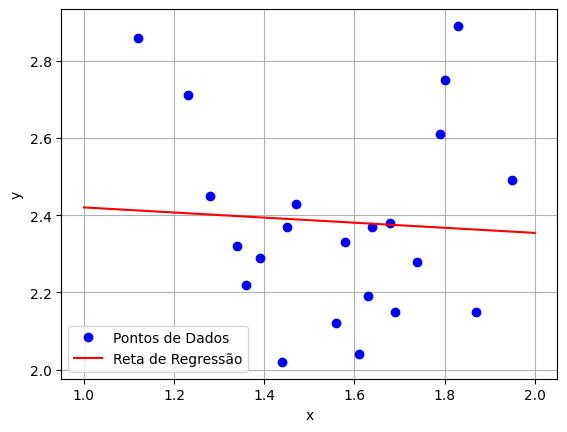

In [ ]:
coord = lambda x: a * x + b

X = np.linspace(1, 2)

# Plota os pontos de dados
plt.plot(x, y, 'o', label='Pontos de Dados', color='blue')

# Plota a reta de regressão
plt.plot(X, coord(X), label='Reta de Regressão', color='red')

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<br>

***

<br>

## Exercício 5: <br>

Generalize o método de mínimos quadrados apresentado acima para determinar a parábola de equação $f(x) = ax^2 + bx + c$ que passa mais próxima aos pontos dados no exercício anterior, explicando seu raciocínio.

In [ ]:
# Dados de temperatura (y) e hora (x)
x = np.array([1.12, 1.23, 1.28, 1.34, 1.36, 1.39, 1.44, 1.45, 1.47, 1.56, 1.58,
              1.61, 1.63, 1.64, 1.68, 1.69, 1.74, 1.79, 1.80, 1.83, 1.87, 1.95])
y = np.array([2.86, 2.71, 2.45, 2.32, 2.22, 2.29, 2.02, 2.37, 2.43, 2.12, 2.33,
              2.04, 2.19, 2.37, 2.38, 2.15, 2.28, 2.61, 2.75, 2.89, 2.15, 2.49])

# Número de pontos de dados
n = len(x)

#np.sum faz o somatório
soma_x2 = np.sum(x**2)
soma_x = np.sum(x)
soma_y = np.sum(y)
soma_xy = np.sum(x*y)

A = np.array([[np.sum(x**4), np.sum(x**3), np.sum(x**2)],
              [np.sum(x**3), np.sum(x**2), np.sum(x)],
              [np.sum(x**2), np.sum(x), n]])

b = np.array([np.sum(y * x**2), np.sum(y * x), np.sum(y)])

#tem que usar o linal.solve no lugar do solve_n por causa das dimensões
resultado = np.linalg.solve(A, b)

# Calcula os coeficientes da reta, os valor de 'a' e 'b' que estão em resultado[0] e resultado[1]
a = resultado[0]
b = resultado[1]
c = resultado[2]

print(f'a = {a}, b = {b}, c = {c}')

a = 3.0282534858169585, b = -9.423879971112296, c = 9.570808534311492


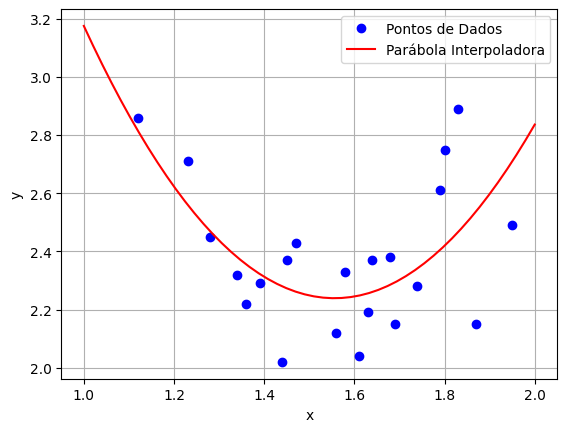

In [ ]:
parabola = lambda x: a * x**2 + b * x + c

X = np.linspace(1, 2)

# Plota os pontos de dados
plt.plot(x, y, 'o', label='Pontos de Dados', color='blue')

# Plota a reta de regressão
plt.plot(X, parabola(X), label='Parábola Interpoladora', color='red')

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()